In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
cd /content/drive/MyDrive/MLProject

/content/drive/MyDrive/MLProject


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
placement = pd.read_csv('placement.csv')
print(placement.columns)

Index(['marks', 'mathemataics', 'qa', 'programming', 'label'], dtype='object')


In [17]:
placement.head()

,marks,mathemataics,qa,programming,label
0,23,34,34,89,1
1,43,45,34,98,1
2,32,56,32,87,1
3,32,34,34,89,1
4,43,43,34,98,1


<Axes: ylabel='count'>

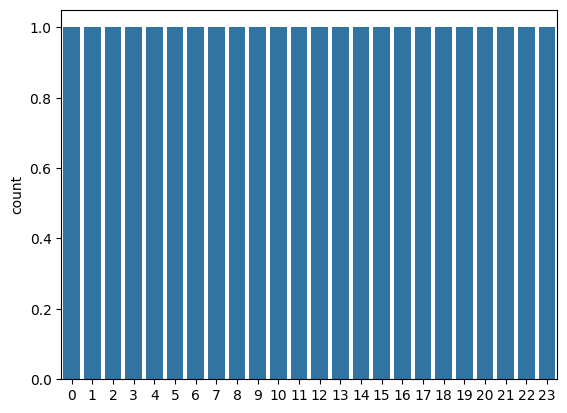

In [18]:
import seaborn as sns
sns.countplot(placement['label'],label="Count")

In [19]:
print(placement.groupby('label').size())

label
0    12
1    12
dtype: int64


In [20]:
placement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   marks         24 non-null     int64
 1   mathemataics  24 non-null     int64
 2   qa            24 non-null     int64
 3   programming   24 non-null     int64
 4   label         24 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB


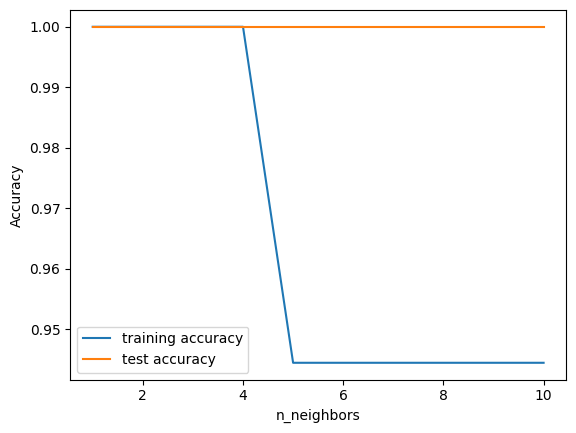

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(placement.loc[:, placement.columns != 'label'], placement['label'], stratify=placement['label'], random_state=66)
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [22]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.94
Accuracy of K-NN classifier on test set: 1.00


In [23]:
import joblib

# Save the trained model
joblib.dump(knn, "knn_model.pkl")

['knn_model.pkl']

In [24]:
import joblib

# Load the model
knn_loaded = joblib.load("knn_model.pkl")
inputdata=[[10,14,50,67]]
print(knn_loaded.predict(inputdata))

[1]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [25]:
inputdata=[[10,140,80,55]]
print(knn.predict(inputdata))

[0]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
a = int(input("Enter Mark 1: "))
b = int(input("Enter Mark 2: "))
c = int(input("Enter Mark 3: "))
d = int(input("Enter Mark 4: "))
inputdata = [[a, b, c, d]]
v=(knn.predict(inputdata))
if(v==[1]):
    print("Congrats! You Got Placement")
else:
    print("Sorry! You Will Not Get Placement")